# 90 Day Fiance - Random Forest

https://stackabuse.com/random-forest-algorithm-with-python-and-scikit-learn/

https://www.datacamp.com/community/tutorials/random-forests-classifier-python

* supervised machine learning algorithm based on ensemble learning
* combines multiple decision trees

### how the random forest algorithm works (basic steps)

* pick N random records from the dataset
* build a decision tree based on these N records
* choose the number of trees you want in your algorithm and repeat steps 1 and 2
* classification problem: each tree in the forest predicts the category to which the new record belongs - finally, the new record is assigned to the category that wins the majority vote

### advantages of using random forest

* not biased, since, there are multiple trees and each tree is trained on a subset of data
* very stable - even if a new data point is introduced in the dataset the overall algorithm is not affected much since new data may impact one tree, but it is very hard for it to impact all the trees
* works well when you have both categorical and numerical features
* works well when data has missing values or it has not been scaled well

### disadvantages of using random forest

* complexity - required much more computational resources, owing to the large number of decision trees joined together
* require much more time to train than other comparable algorithms

## using random forest for classification

In [73]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# divide data into testing and training sets
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import StandardScaler

# random forest model
from sklearn.ensemble import RandomForestClassifier

# check model accuracy
from sklearn import metrics

# training the algorithm
from sklearn.ensemble import RandomForestRegressor

# evaluating the algorithm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [114]:
# load 90 Day data
fiances = pd.read_csv("data/90-Day-Fiance-regression.csv")

In [115]:
fiances.head()

,usSex,usAgeRange,usRegion,foreignSex,foreignAgeRange,olderSex,olderNat,ageDiffRange,continent,met,stayTogether
0,0,1,2,1,1,0,0,1,1,1,1
1,0,1,0,1,1,0,0,2,1,2,1
2,0,2,1,1,2,0,0,1,4,0,1
3,0,2,1,1,1,0,0,2,2,0,1
4,1,1,1,0,1,0,1,1,0,1,0


In [116]:
fiances.shape

(58, 11)

In [30]:
fiances.columns

Index(['move', 'usSex', 'usAgeRange', 'usRegion', 'usDivision', 'foreignSex',
       'foreignAgeRange', 'olderSex', 'olderNat', 'ageDiffRange', 'continent',
       'met', 'stayTogether'],
      dtype='object')

### prepare data for training

In [125]:
feature_names = ['usSex', 'usAgeRange', 'usRegion', 'foreignAgeRange', 'olderSex', 'olderNat', 
                 'ageDiffRange', 'continent', 'met', ]

In [126]:
# divide data: features
X = fiances[feature_names]

# divide data: labels
y = fiances['stayTogether']

In [127]:
# divides data into training and testing sets: 70% training, 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### train the model

In [128]:
# create a gaussian classifier

clf = RandomForestClassifier(n_estimators = 100)

In [129]:
# train model using the training sets y_pred=clf.predict(X_test)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

### check accuracy using actual and predicted values

In [130]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6666666666666666


### finding important features in Scikit-learn

1) create a random forests model

2) use the feature importance variable to see feature importance scores

3) visualize these scores using the seaborn library

In [131]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',max_depth=None, max_features='auto', 
                       max_leaf_nodes=None, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, 
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1, oob_score=False, 
                       random_state=None, verbose=0, warm_start=False)

RandomForestClassifier(n_jobs=1)

In [141]:
feature_imp = pd.Series(clf.feature_importances_,index=feature_names).sort_values(ascending=False)
feature_imp

ageDiffRange       0.220717
met                0.146317
continent          0.137405
usAgeRange         0.122185
foreignAgeRange    0.107901
usRegion           0.103233
usSex              0.064991
olderSex           0.050858
olderNat           0.046393
dtype: float64

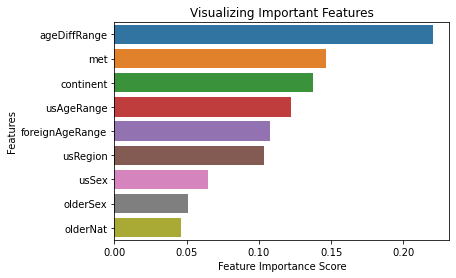

In [142]:
#  bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# addlabels 
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()